**Jake McRoberts  
July 9th, 2017  
Case Study: Retail Sales Data**

# Improve Demand Forecasting using Retail Sales Data

Python version used for analyses: 3.6.X

Data files: 
- sales.txt
- article_master.txt

Tasks:
1. Prepare and analyze the data to assure sufficient quality and suitability for the business case study.
2. Identify what is driving sales and which type of promotion has a stronger impact on sales.
3. Forecast sales (sold units) for the following month. 
4. Perform appropriate diagnostics to check whether your methods and results from above are reliable.

## 1. Import, clean, and wrangle sales data to ensure data quality and suitability for analysis

#### Import Data

In [38]:
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

# import transactional sales data of articles into a pandas dataframe
data_sales = pd.read_csv("sales.txt", sep = ";")

# import attribute data of sold articles
data_attribute = pd.read_csv("article_master.txt", sep = ";")

#### Inspect Data

Verify data looks clean and suitable from a high level view of it.

In [1]:
data_sales.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2
0,Germany,AA1821,62,31.95,25.95,0.812207,2014-12-28,1,0
1,Germany,AA1821,29,31.95,22.95,0.718310,2015-01-04,0,0
2,Germany,AA1821,58,31.95,28.95,0.906103,2015-01-11,0,0
3,Germany,AA1821,49,31.95,29.95,0.937402,2015-01-18,0,0
4,Germany,AA1821,883,31.95,24.95,0.780908,2015-01-25,0,0


In [11]:
data_sales.shape

(81426, 9)

Check for any NaN values in sales transactional data.

In [13]:
data_sales.isnull().values.any()

False

In [152]:
data_sales.describe()

,sales,regular_price,current_price,ratio,promo1,promo2
count,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000
mean,57.048375,52.620695,28.356811,0.544464,0.065041,0.005060
std,88.506045,35.549601,22.704746,0.192692,0.246599,0.070953
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000
50%,26.000000,41.450000,20.950000,0.523526,0.000000,0.000000
75%,65.000000,79.950000,37.950000,0.697322,0.000000,0.000000
max,898.000000,197.950000,197.950000,1.000000,1.000000,1.000000


In [14]:
data_attribute.head()

,article,category,productgroup,cost
0,OC6355,TRAINING,SHOES,13.29
1,AP5568,TRAINING,SHORTS,2.29
2,CB8861,GOLF,HARDWARE ACCESSORIES,1.70
3,LI3529,RUNNING,SHOES,9.00
4,GG8661,RELAX CASUAL,SHOES,9.60


In [15]:
data_attribute.shape

(476, 4)

Check for any NaN values in sales attribute data.

In [41]:
data_attribute.isnull().values.any()

False

In [153]:
data_attribute.describe()

,cost
count,476.00000
mean,5.17792
std,3.36282
min,0.40000
25%,2.60000
50%,4.25000
75%,7.90000
max,19.80000


From a high level perspective, the data looks okay. There aren't any NaN's in either dataset and the size of the dataframes makes sense based on the size of the raw data in the text files. The descriptive statistics on the data looks great as well. Next, let's do some plotting to visualize what kind of data and how much data I am working with regarding categories, etc.

#### Plot Data

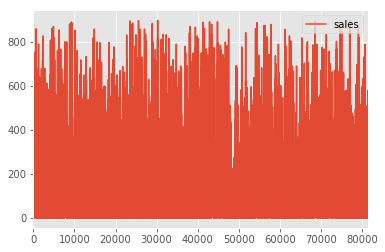

In [117]:
plt.figure()
data_sales.plot(y = 'sales')
plt.show()

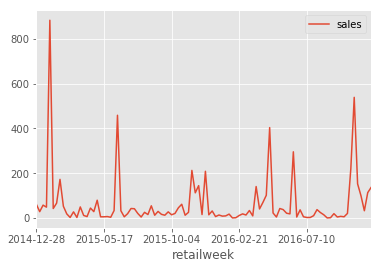

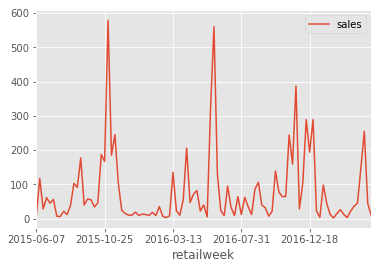

In [97]:
plt.figure()
data_sales[0:100].plot(x = 'retailweek', y = 'sales')
data_sales[-100:-1].plot(x = 'retailweek', y = 'sales')
plt.show()

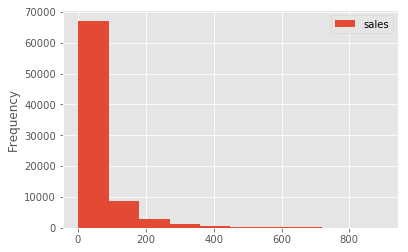

In [116]:
plt.figure()
data_sales.plot(y = 'sales', kind = 'hist')
plt.show()

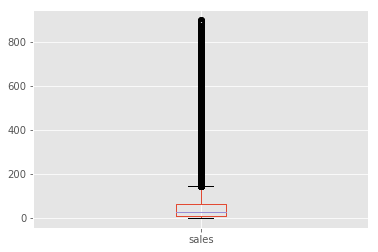

In [133]:
plt.figure()
data_sales.plot(y = ['sales'], kind = 'box')
plt.show()

Sales data looks as expected; there are a lot of outliers likely at high sale times (like Christmas / winter holiday and summer before school starts). The sales data is pretty cyclical in addition to being heavily skewed with the vast majority of weeks with sales of less than 100 items for each item type.

Examine price data now.

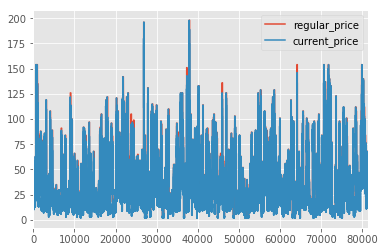

In [114]:
plt.figure()
data_sales.plot(y = ['regular_price', 'current_price'])
plt.show()

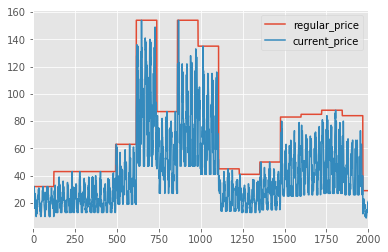

In [118]:
plt.figure()
data_sales[0:2000].plot(y = ['regular_price', 'current_price'])
plt.show()

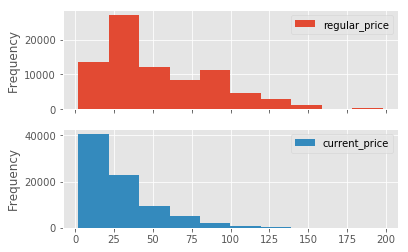

In [129]:
plt.figure()
data_sales.plot(y = ['regular_price', 'current_price'], kind = 'hist', subplots = True)
plt.show()

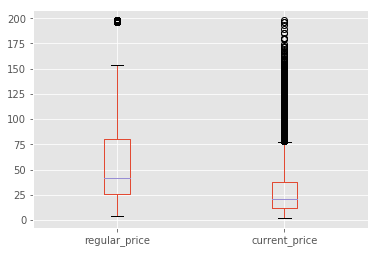

In [132]:
plt.figure()
data_sales.plot(y = ['regular_price', 'current_price'], kind = 'box')
plt.show()

Pricing data (regular price and current price) both look as expected; the regular price is higher than the current price (indicating that discounts, like promo1 and/or promo2, reduce the price). Both price datasets are skewed but the regular price looks like it could be closer to a normal distribution. The majority of items that are sold are priced under 75 euro.

Look into the ratio data (`ratio = current_price / regular_price`).

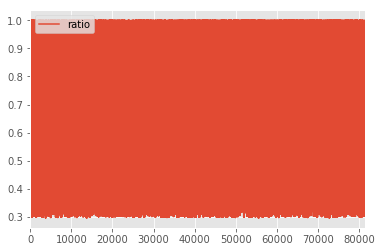

In [119]:
plt.figure()
data_sales.plot(y = 'ratio')
plt.show()

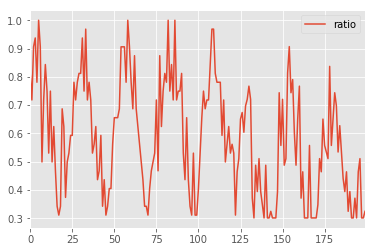

In [125]:
plt.figure()
data_sales[0:200].plot(y = 'ratio')
plt.show()

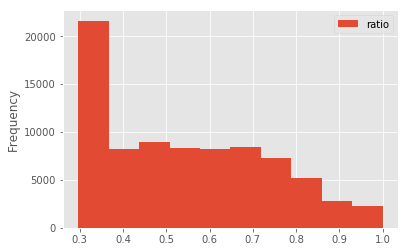

In [120]:
plt.figure()
data_sales.plot(y = 'ratio', kind = 'hist')
plt.show()

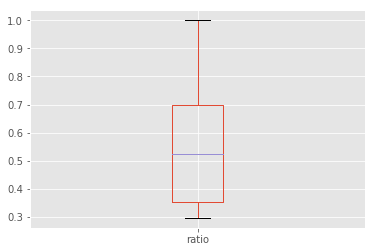

In [134]:
plt.figure()
data_sales.plot(y = ['ratio'], kind = 'box')
plt.show()

Ratio data is similarly skewed like the sales and pricing data - the cyclical nature of pricing items is very apparent in the data when zooming in on a smaller sample of the ratio data.

Examine the promo data (1 and 2) next.

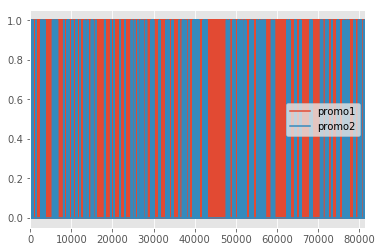

In [126]:
plt.figure()
data_sales.plot(y = ['promo1', 'promo2'])
plt.show()

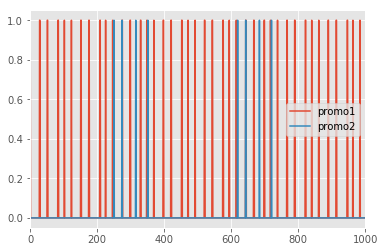

In [121]:
plt.figure()
data_sales[0:1000].plot(y = ['promo1', 'promo2'])
plt.show()

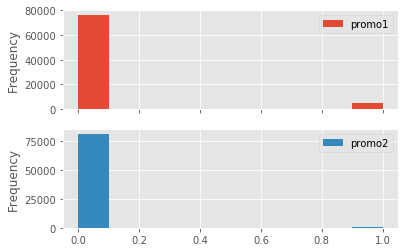

In [131]:
plt.figure()
data_sales.plot(y = ['promo1', 'promo2'], kind = 'hist', subplots = True)
plt.show()

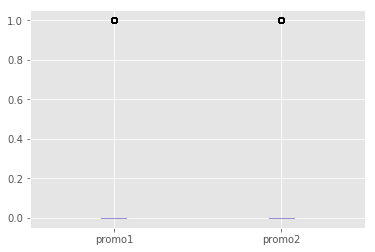

In [136]:
plt.figure()
data_sales.plot(y = ['promo1', 'promo2'], kind = 'box')
plt.show()

Plotting the promotion data doesn't yield much when looking for a distribution since the values are either '0' or '1' at all times. It is good to confirm that the data is clean.

Inspect the actual cost data from the second text data file holding attribute data for each article of clothing.

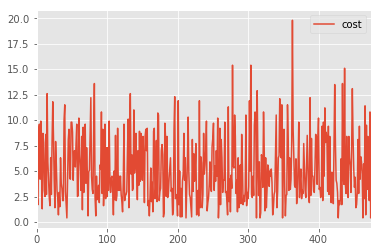

In [139]:
plt.figure()
data_attribute.plot(y = 'cost')
plt.show()

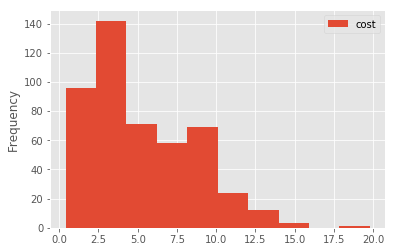

In [140]:
plt.figure()
data_attribute.plot(y = 'cost', kind = 'hist')
plt.show()

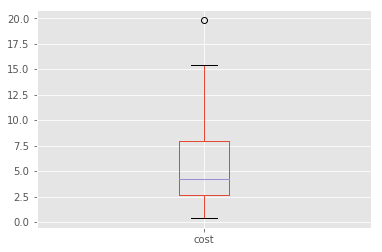

In [141]:
plt.figure()
data_attribute.plot(y = 'cost', kind = 'box')
plt.show()

Cost data looks reasonable; there aren't any large outliers besides one item that costs roughly 20 euro. The data is skewed similarly to the other numerical data, although the shape is closest to the price data. I'll examine the outlier to see if it seems like a real data point.

In [154]:
data_attribute[data_attribute['cost'] > 17]

,article,category,productgroup,cost
363,NE7168,PORSCHE,SHOES,19.8


The outlier above is a real data point. I know that adidas has a relationship with Porsche for branding of clothing articles and it would make sense for it to be more expensive that a non-Porsche branded piece of clothing considering the Porsche brand.

Overall, the data looks great. I'll move on to digging into the data to find what drives sales and if the promotions provide value add to sales numbers while keeping profits high.

## 2. Identify what is driving sales and which type of promotion has a stronger impact on sales.